In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data_clean.csv")
print(data)

     Unnamed: 0  Ozone  Solar.R  Wind Temp C Month  Day  Year  Temp Weather
0             1   41.0    190.0   7.4     67     5    1  2010    67       S
1             2   36.0    118.0   8.0     72     5    2  2010    72       C
2             3   12.0    149.0  12.6     74     5    3  2010    74      PS
3             4   18.0    313.0  11.5     62     5    4  2010    62       S
4             5    NaN      NaN  14.3     56     5    5  2010    56       S
..          ...    ...      ...   ...    ...   ...  ...   ...   ...     ...
153         154   41.0    190.0   7.4     67     5    1  2010    67       C
154         155   30.0    193.0   6.9     70     9   26  2010    70      PS
155         156    NaN    145.0  13.2     77     9   27  2010    77       S
156         157   14.0    191.0  14.3     75     9   28  2010    75       S
157         158   18.0    131.0   8.0     76     9   29  2010    76       C

[158 rows x 10 columns]


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


In [4]:
print(type(data))
print(data.shape)
print(data.size)

<class 'pandas.core.frame.DataFrame'>
(158, 10)
1580


In [5]:
data1 = data.drop(['Unnamed: 0',"Temp C"],axis = 1)
data1

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2010,67,S
1,36.0,118.0,8.0,5,2,2010,72,C
2,12.0,149.0,12.6,5,3,2010,74,PS
3,18.0,313.0,11.5,5,4,2010,62,S
4,NaN,NaN,14.3,5,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,2010,67,C
154,30.0,193.0,6.9,9,26,2010,70,PS
155,NaN,145.0,13.2,9,27,2010,77,S
156,14.0,191.0,14.3,9,28,2010,75,S


In [6]:
data1['Month']=pd.to_numeric(data['Month'],errors='coerce')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Month    157 non-null    float64
 4   Day      158 non-null    int64  
 5   Year     158 non-null    int64  
 6   Temp     158 non-null    int64  
 7   Weather  155 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 10.0+ KB


In [7]:
data1.rename({'Solar.R': 'Solar'},axis=1,inplace = True)
data1

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S
156,14.0,191.0,14.3,9.0,28,2010,75,S


In [8]:
data1.isnull().sum()

Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

<Axes: >

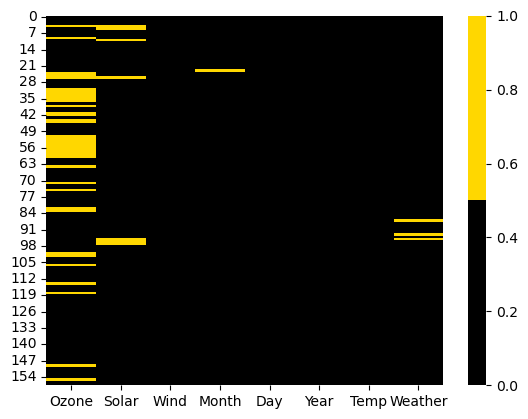

In [9]:
cols = data1.columns
colors = ['black', 'gold']
sns.heatmap(data1[cols].isnull(),cmap=sns.color_palette(colors),cbar = True)

In [10]:
median_ozone = data1["Ozone"].median()
mean_ozone = data1["Ozone"].mean()
print("Median of Ozone: ", median_ozone)
print("Mean of Ozone: ", mean_ozone)

Median of Ozone:  30.5
Mean of Ozone:  41.583333333333336


In [11]:
data1['Ozone'] = data1['Ozone'].fillna(median_ozone)
data1.isnull().sum()

Ozone      0
Solar      7
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [12]:
print(data1["Weather"].value_counts())
mode_weather = data1["Weather"].mode()[0]
print(mode_weather)

Weather
S     59
C     49
PS    47
Name: count, dtype: int64
S


In [13]:
data1["Weather"] = data1["Weather"].fillna(mode_weather)
data1.isnull().sum()

Ozone      0
Solar      7
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

In [14]:
#detection of outliers in the columns
#method1: using histograms and box plots

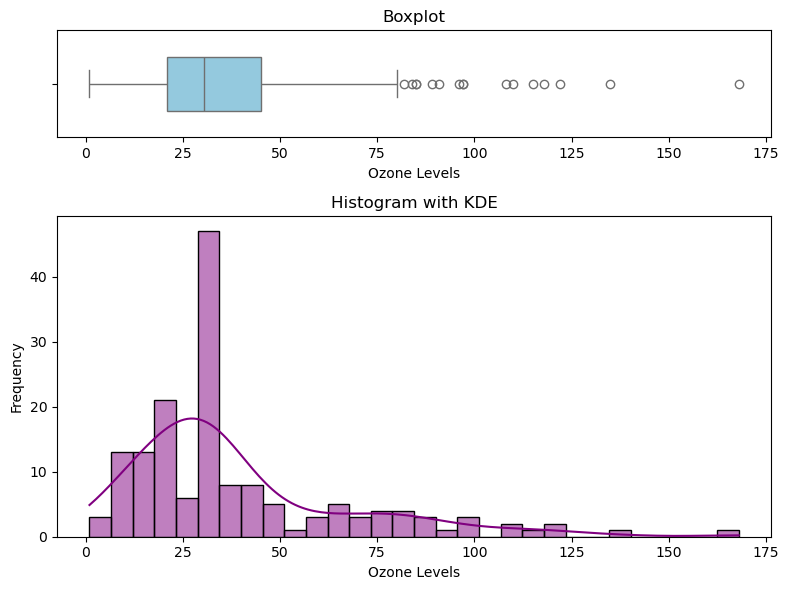

In [15]:
fig,axes = plt.subplots(2,1, figsize=(8,6), gridspec_kw={'height_ratios': [1,3]})

sns.boxplot(data=data1["Ozone"], ax=axes[0], color='skyblue',width=0.5, orient = 'h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("Ozone Levels")


sns.histplot(data1["Ozone"], kde=True, ax= axes[1], color='purple', bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("Ozone Levels")
axes[1].set_ylabel("Frequency")


plt.tight_layout()

plt.show()

In [16]:
#Observations
#the ozone column has extreme values beyond 81 as seen from box plot
#the same is confirmed form the below right-skewed histogram


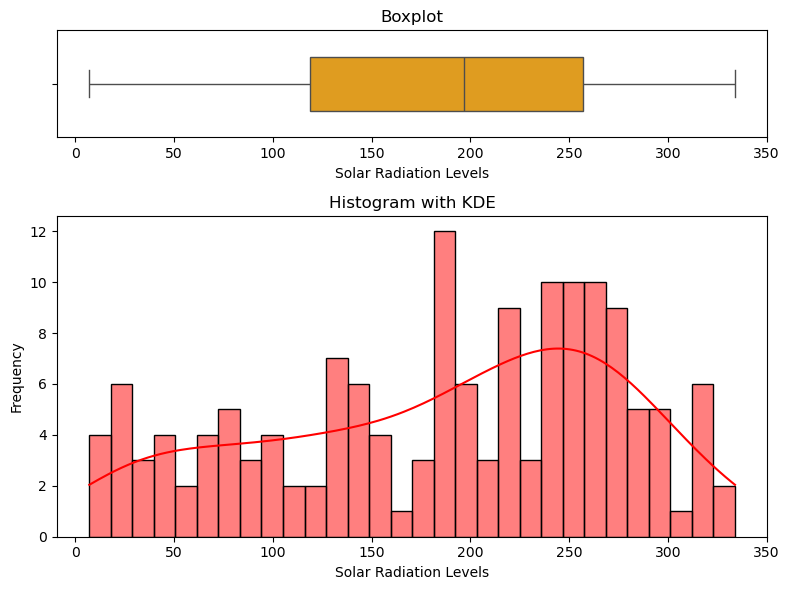

In [17]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 3]})

sns.boxplot(data=data1["Solar"], ax=axes[0], color='orange', width=0.5, orient='h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("Solar Radiation Levels")

sns.histplot(data1["Solar"], kde=True, ax=axes[1], color='red', bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("Solar Radiation Levels")
axes[1].set_ylabel("Frequency")

plt.tight_layout()

plt.show()



{'whiskers': [<matplotlib.lines.Line2D at 0x16eaa853470>,
 'caps': [<matplotlib.lines.Line2D at 0x16eac2a8a40>,
 'boxes': [<matplotlib.lines.Line2D at 0x16eaa891a30>],
 'medians': [<matplotlib.lines.Line2D at 0x16eac2a8f50>],
 'fliers': [<matplotlib.lines.Line2D at 0x16eac2a9190>],
 'means': []}

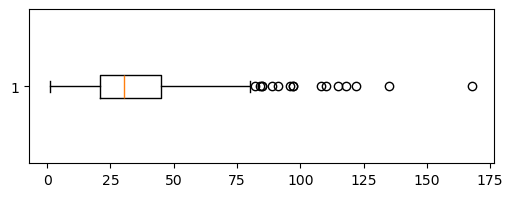

In [18]:
plt.figure(figsize=(6,2))
plt.boxplot(data1["Ozone"],vert= False)

[array([115., 135.,  97.,  97.,  85., 108.,  82., 122.,  89., 110., 168.,
        118.,  84.,  85.,  96.,  91.])]

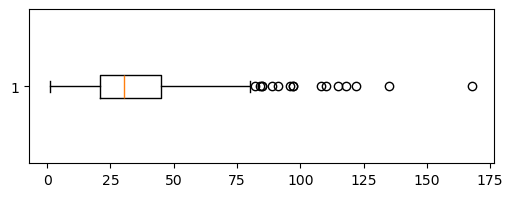

In [19]:
plt.figure(figsize=(6,2))
boxplot_data = plt.boxplot(data1["Ozone"],vert= False)
[item.get_xdata() for item in boxplot_data['fliers']]


In [20]:
mu = data1["Ozone"].describe()[1]
sigma = data1["Ozone"].describe()[2]

for x in data1["Ozone"]:
    if ((x < (mu - 3*sigma)) or (x > (mu + 3*sigma))):
        print(x)


135.0
168.0


C:\Users\user\AppData\Local\Temp\ipykernel_4364\2718194160.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mu = data1["Ozone"].describe()[1]
C:\Users\user\AppData\Local\Temp\ipykernel_4364\2718194160.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma = data1["Ozone"].describe()[2]


In [21]:
#observations
#it is observed that only two outliers  are idenfied using std method
# in box plot method more no of outliers are identified

Text(0.5, 0, 'Theoretical Quantiles')

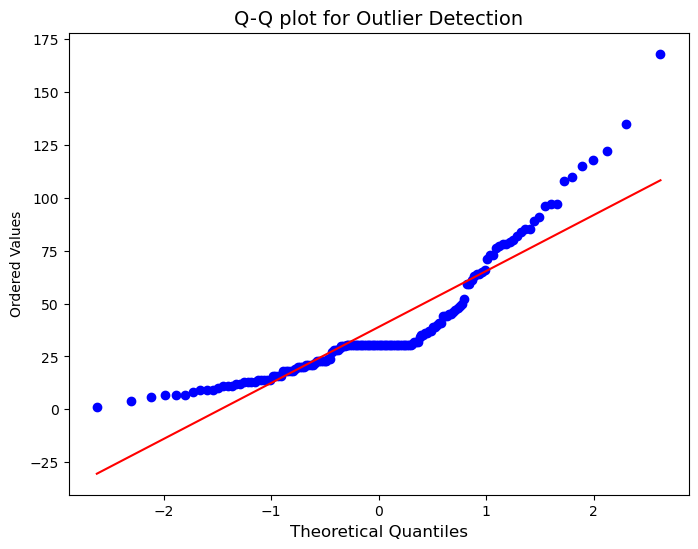

In [22]:
import scipy.stats as stats
plt.figure(figsize=(8,6))
stats.probplot(data1["Ozone"],dist="norm", plot=plt)
plt.title("Q-Q plot for Outlier Detection", fontsize=14)
plt.xlabel("Theoretical Quantiles", fontsize=12)

Text(0.5, 1.0, 'Violin plot')

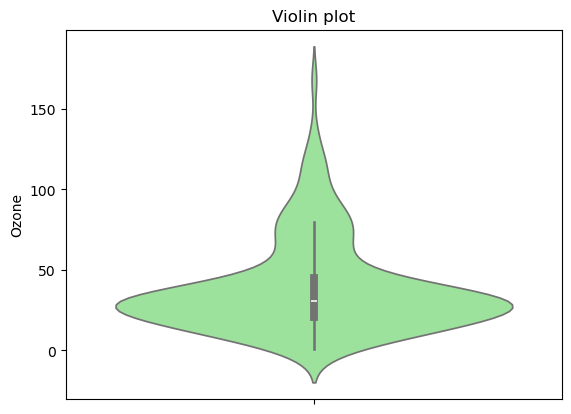

In [23]:
sns.violinplot(data=data1["Ozone"], color='lightgreen')
plt.title("Violin plot")

C:\Users\user\AppData\Local\Temp\ipykernel_4364\209586805.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=data1, x = "Weather", y = "Ozone",color="orange",palette="Set2",size=6)


<Axes: xlabel='Weather', ylabel='Ozone'>

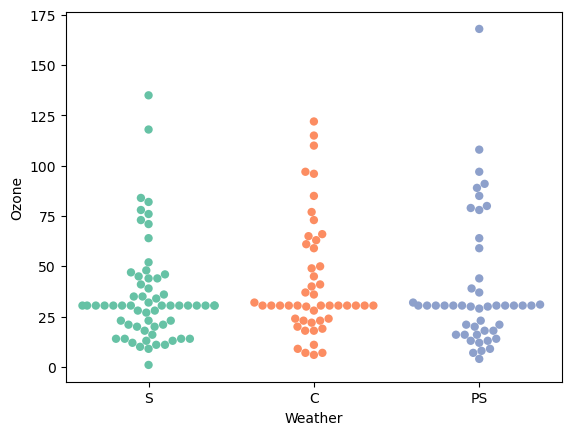

In [28]:
sns.swarmplot(data=data1, x = "Weather", y = "Ozone",color="orange",palette="Set2",size=6)

C:\Users\user\AppData\Local\Temp\ipykernel_4364\489543265.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=data1, x = "Weather", y = "Ozone",color="orange", palette="Set1", size=6, jitter = True)


<Axes: xlabel='Weather', ylabel='Ozone'>

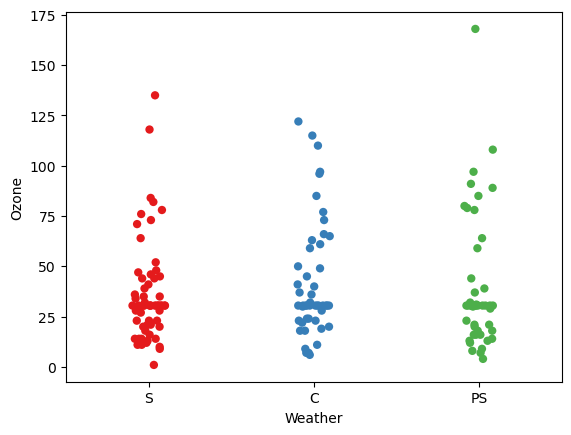

In [25]:
sns.stripplot(data=data1, x = "Weather", y = "Ozone",color="orange", palette="Set1", size=6, jitter = True)

<Axes: xlabel='Ozone', ylabel='Density'>

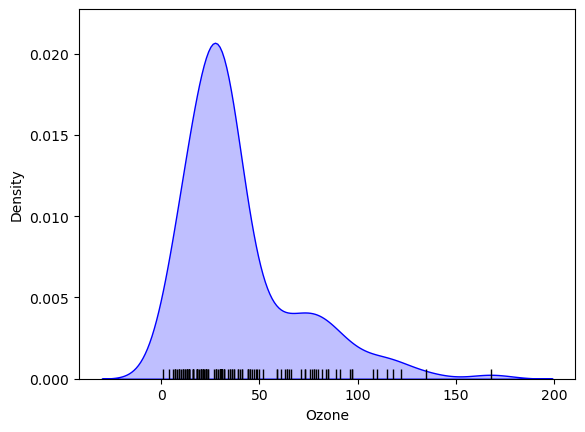

In [37]:
sns.kdeplot(data=data1["Ozone"], fill=True, color="blue")
sns.rugplot(data=data1["Ozone"], color="black")

<Axes: xlabel='Weather', ylabel='Ozone'>

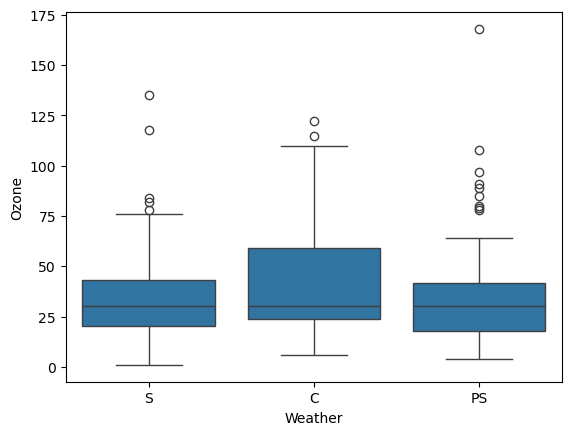

In [33]:
sns.boxplot(data = data1, x = "Weather", y ="Ozone")

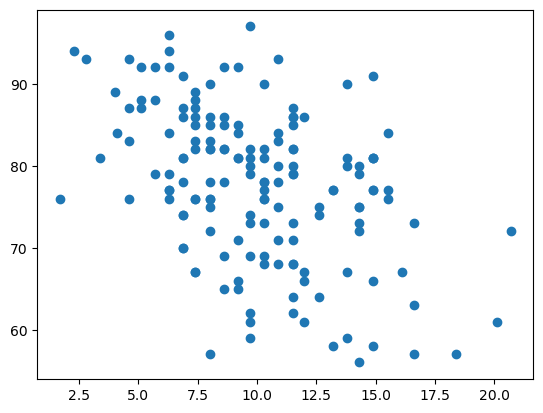

In [38]:
plt.scatter(data1["Wind"], data1["Temp"])

In [39]:
data1_numeric = data1.iloc[:,[0,1,2,6]]
data1_numeric

,Ozone,Solar,Wind,Temp
0,41.0,190.0,7.4,67
1,36.0,118.0,8.0,72
2,12.0,149.0,12.6,74
3,18.0,313.0,11.5,62
4,30.5,NaN,14.3,56
...,...,...,...,...
153,41.0,190.0,7.4,67
154,30.0,193.0,6.9,70
155,30.5,145.0,13.2,77
156,14.0,191.0,14.3,75


In [40]:
data1["Wind"].corr(data1["Temp"])

-0.441246717631239